In [1]:
exec(open("cleanup.py").read())

In [2]:
import json
from collections import defaultdict

def get_response(fname):
    with open(fname, 'r') as f:
        data = f.read()

    response = json.loads(data)

    surv_resp = defaultdict(dict)
    pass_resp = defaultdict(str)
    time_resp = defaultdict(str)

    for k, v in response.items():
        if 'response' in k:
            temp = k.split("_")
            pid = temp[0].strip('p')
            v = json.loads(v)
            surv_resp[pid].update(v)
        elif 'time' in k:
            temp = k.split("_")
            pid = temp[0]
            time_resp[pid] = float(v)
        elif 'password' in k:
            pass_resp[k] = v

    return (pass_resp, time_resp, surv_resp)

In [3]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [4]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Stimulation': [5, 7, 8, 9],
    'Novelty': [10, 11, 12, 13],
    'Aesthetics': [14, 16, 17, 18],
    'Usefulness': [19, 20, 21, 22],
    'Clarity': [23, 24, 25, 26],
    'Engagement': [27],
    'Informative': [28],
    'Attention': [6, 15, 29]
}

In [6]:
import os
fpath = './responses'
password_response = []
time_response = []
survey_response = []
for i, fname in enumerate(os.listdir(fpath)):
    pss, tim, sur = get_response(os.path.join(fpath, fname))
    password_response.append(pss)
    time_response.append(tim)
    survey_response.append(sur)

In [7]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password1,password1_recall1,password2,password2_recall1,password2_recall2,password2_recall3
0,ramropassword@09,NaN,malekosaasan@1994,malekosasan@1994,maalekosaasan@19944,maalekosaasan@1994
1,bankkoaccount@123,bankkoaccount@1233,ishouldcreatestrongpassword@123,NaN,NaN,NaN


In [8]:
page_time_df = pd.DataFrame(time_response)
page_time_df_sorted = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df_sorted

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15.353,35.620,4.721,76.599,13.446,16.145,68.430,148.547,129.065,12.815,78.915,8.332,59.734,29.451
1,26.206,37.073,26.425,78.942,26.393,14.027,32.727,175.211,93.015,22.265,44.518,19.347,92.398,20.939


In [9]:
page_time_df_sorted.rename(page_map, axis=1)

,startstudy,fpass,fcog,fpasssurvey,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall
0,15.353,35.620,4.721,76.599,13.446,16.145,68.430,148.547,129.065,12.815,78.915,8.332,59.734,29.451
1,26.206,37.073,26.425,78.942,26.393,14.027,32.727,175.211,93.015,22.265,44.518,19.347,92.398,20.939


<AxesSubplot:xlabel='Page Name', ylabel='Time (in seconds)'>

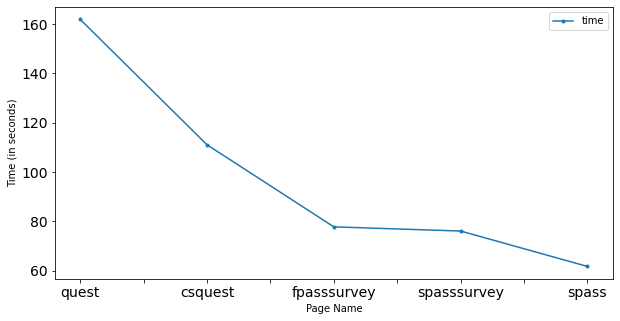

In [10]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[page_map.get(i), data]], columns=top5.columns)])

top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [11]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,7,8,14,12,3
0,"{'1-27': '6', '1-21': '6', '1-22': '5', '1-24'...","{'3-1': '6', '4-1': '3', '5-1': '6', '6-1': ['...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...","{'1-1': '7', '2-1': '5', '2-2': '1', '2-3': '7...","{'1-1': '6', '2-1': '5', '2-2': '2', '2-3': '5..."
1,"{'1-21': '6', '1-25': '5', '1-23': '4', '1-24'...","{'4-1': '3', '6-1': ['Email', 'Financial Websi...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-...","{'1-1': '7', '2-1': '6', '2-2': '1', '2-3': '1...","{'1-1': '7', '2-1': '1', '2-2': '2', '2-3': '1..."


In [12]:
questions = {}
for page_id, response in survey_response[0].items():
    page_name = page_map.get(page_id)
    question_file = f'{page_name}.json'

    with open(f'questions/{question_file}', 'r') as f:
        questions[page_id] = json.loads(f.read())

### First Password Survey Analysis

In [16]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,The password I have created is:,"[{'sid': 1, 'type': 'likert', 'title': '', 'el..."
1,2,The password I have created:,"[{'sid': 1, 'type': 'likert', 'title': 'is har..."
2,3,Which of the following you have used in the pa...,"[{'sid': 1, 'type': 'checkbox', 'title': '', '..."
3,4,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [17]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1
1-1,6,7
2-1,5,1
2-2,2,2
2-3,5,1
3-1,[None of the above],[None of the above]
4-1,6,7
4-2,6,7
4-3,5,5
4-4,3,6


In [39]:
def get_qdetails(pid, qsid):
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text
get_qdetails('3', '1-1')

"The password I have created is: \n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Weak', 'high': 'Strong'}}"

In [18]:
# quest
pd.DataFrame(survey_response_df['7'].to_dict())

,0,1
1-27,6,7
1-21,6,6
1-22,5,6
1-24,6,5
1-23,6,4
1-26,2,2
1-25,6,5
1-28,4,4
1-12,5,2
1-16,6,5


In [133]:
# csquest
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1
3-1,6,NaN
4-1,3,3
5-1,6,NaN
6-1,"[Social Media, Email, Financial Websites, Gove...","[Email, Financial Websites, E-commerce Website..."
1-1,6,3
1-2,6,5
1-3,6,5
1-4,6,3
1-5,4,6
2-1,7,7


In [135]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1
1-1,Man,Woman
2-1,25-29 years old,25-29 years old
3-1,[Asian],[Asian]
4-1,Graduate degree (MS/Doctorate),Four-year College Degree
5-1,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ..."
6-1,Business or industry,Student
7-1,Hold or held a work position,Pursuing or completed a degree
8-1,Hold or held a work position,Pursuing or completed a degree
